In [228]:
import sys
from tensorflow.python.keras.models import model_from_json
json_file = open('model.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
import cv2
import numpy as np
img = cv2.imread('4.JPEG')
import os
root = os.getcwd()
if img is not None:
    #images.append(img)

    train_data=[]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    
    # convert to float
    pixel_values = np.float32(pixel_values)
    #K means with k=2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    img=segmented_image
    flag=0
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    
    #This for loop separates the segmented digits and operations
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    #this for loop remove border black pixels to center the digits  
    word =1 
    letter_index = 0
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        #to not remove indices from middle(for ''='' case)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        letter_index += 1
        temp0=np.pad(temp0[:,:,0],pad_width=20,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        element=cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
        im2=temp0
        for i in range(0, 1):
            eroded = cv2.erode(temp0.copy(), element, iterations=i + 1)
            im2=eroded
            T, threshInv = cv2.threshold(eroded, 230, 0, cv2.THRESH_BINARY_INV)
  

        temp0 = im2[:,:,0]
        im_resize = cv2.resize(temp0,(32,32))
#         cv2.imwrite(os.path.join(root, str(i+1)+''+str(word)+''+str(letter_index)+'.jpg'),im_resize )
        
        im_resize=np.reshape(im_resize,(32,32,1))
        train_data.append(im_resize)
len(train_data)
s=''
x=[]
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,32,32,1)
#     result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==12):
        t=12
        x.append(t)
        s=s+'='
    if(result[0]==13):
        t=13
        x.append(t)
        s=s+'x'
    if(result[0]==14):
        t=14
        x.append(t)
        s=s+'y'
    if(result[0]==10):
        t=10
        x.append(t)
        s=s+'-'
    if(result[0]==11):
        t=11
        x.append(t)
        s=s+'+'
    if(result[0]==0):
        t=0
        x.append(t)
        s=s+'0'
    if(result[0]==1):
        t=1
        x.append(t)
        s=s+'1'
    if(result[0]==2):
        t=2
        x.append(t)
        s=s+'2'
    if(result[0]==3):
        t=3
        x.append(t)
        s=s+'3'
    if(result[0]==4):
        t=4
        x.append(t)
        s=s+'4'
    if(result[0]==5):
        t=5
        x.append(t)
        s=s+'5'
    if(result[0]==6):
        t=6
        x.append(t)
        s=s+'6'
    if(result[0]==7):
        t=7
        x.append(t)
        s=s+'7'
    if(result[0]==8):
        t=8
        x.append(t)
        s=s+'8'
    if(result[0]==9):
        t=9
        x.append(t)
        s=s+'9'
print(s)
print(x)

1x+6=0
[1, 13, 11, 6, 12, 0]


In [229]:
import numpy as np
from sympy import solve
from sympy.plotting import plot

In [230]:
#Mapping labels to their digits and operations
import numpy as np

# dic={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'+',11:'-',12:'=',13:'x'}
eqn=''
dic={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'-',11:'+',12:'=',13:'x',14:'y'}
#print equation f
def printEq(x):
    t=''
    flag=0
    for i in range(len(x)):
        
        if flag==1:
            flag=0
            continue
        if(x[i]==12):
            break
        if i!=len(x)-1 and dic[x[i]]=='x'and x[i+1]!=10 and x[i+1]!=11 and x[i+1]!=12:
            t=t+'x**'+str(dic[x[i+1]])
#             print('x**'+str(dic[x[i+1]]), end=" ")
            flag=1
        elif i!=len(x)-1 and (0<=x[i]<=9 and x[i+1]==13 or x[i+1]==14):
            t=t+str(dic[x[i]])+'*'
        else :
            t=t+str(dic[x[i]])
#             print(dic[x[i]], end=" ")
    return t
def solution(x):
    eqn=printEq(x)
    print(eqn)
    print(solve(eqn))
    plot(eqn)


1*x+6
[-6]


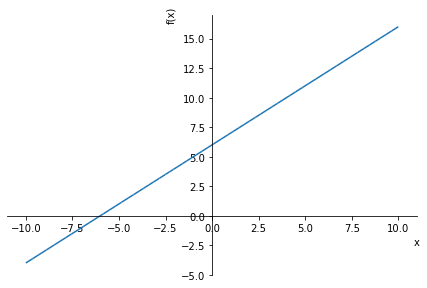

In [231]:
solution(x)

In [232]:
print(eqn)